# Session 29 Data Preprocessing

# read the dataset 

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/train.csv', delimiter=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Data Shape
df.shape

(891, 12)

## check percentage of target class

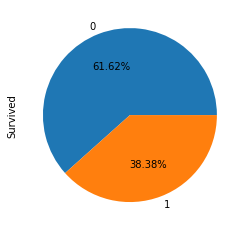

In [ ]:
import matplotlib.pyplot as plt

data = df['Survived'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

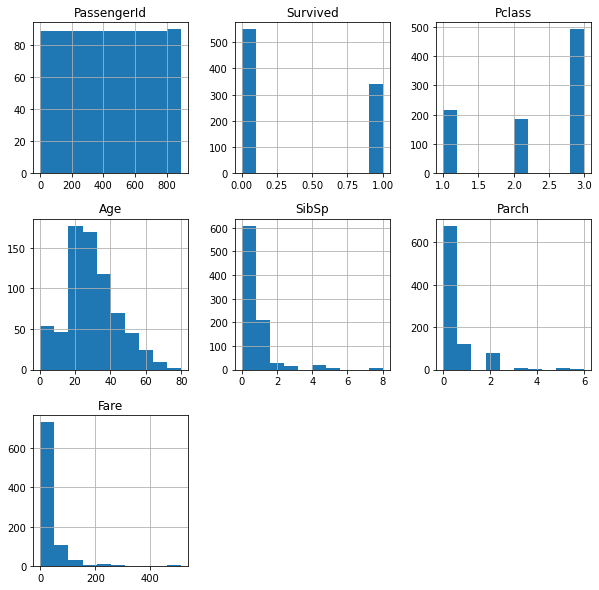

In [ ]:
df.hist(figsize=(10,10))
plt.show()

## check missing values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Missing Value Check
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## duplicates

In [ ]:
# Duplicate check
df.duplicated().sum()


0

In [ ]:
df.drop_duplicates(inplace=True)

## imputation

In [ ]:
#imputation. kita isi nilai kosong
# kolom numerik
df['Age'].fillna(df['Age'].median(), inplace=True)
#df['Age'].fillna(df['Age'].mean(), inplace=True)

# kolom kategori
df['Cabin'].fillna(df['Cabin'].value_counts().index[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df['Embarked'].value_counts().index[0]

'S'

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## check categorical attributes

In [ ]:
# get X and y
df_X = df.drop(['PassengerId','Name',	'Survived','Cabin','Ticket'],axis=1)
df_y = df[['Survived']]


#check categorical attributes
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['Sex', 'Embarked'], dtype='object')


In [ ]:
df_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


## one-hot encoding untuk input features

In [ ]:
# One Hot Encode
df_onehot = pd.get_dummies(df_X, columns=['Sex', 'Embarked'], drop_first=True)
df_onehot.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


## label encoding untuk input features

In [ ]:
#categorical encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
cat_en = LabelEncoder()
for i in cat_features:
  df_X[i] = cat_en.fit_transform(df_X[i])

df_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


## label encoding untuk target class

In [ ]:
#label encoding for y
le = LabelEncoder()
le.fit(df_y)
df_y= le.fit_transform(df_y)
df_y


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## correlation coefficient

In [ ]:
df_y_new = pd.DataFrame(df_y,columns=['Survived'])
df_gabung = pd.concat([df_X, df_y_new], axis=1)
df_gabung.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098,-0.338481
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262,-0.543351
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754,-0.064910
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230,-0.035322
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798,0.081629
Fare,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719,0.257307
Embarked,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000,-0.167675
Survived,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675,1.000000


## train-test split 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)


In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,male,4.0,0,2,81.8583,S
650,3,male,28.0,0,0,7.8958,S
172,3,female,1.0,1,1,11.1333,S
450,2,male,36.0,1,2,27.7500,S
314,2,male,43.0,1,1,26.2500,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,28.0,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


## standardization

In [ ]:
#scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.63788124,  0.72077194, -1.91971935, ...,  1.99885349,
         0.98099823,  0.57000481],
       [ 0.80326712,  0.72077194, -0.0772525 , ..., -0.47932706,
        -0.46963364,  0.57000481],
       [ 0.80326712, -1.38740139, -2.15002771, ...,  0.75976322,
        -0.40613632,  0.57000481],
       ...,
       [ 0.80326712,  0.72077194,  0.92075038, ..., -0.47932706,
        -0.34778742,  0.57000481],
       [-1.63788124, -1.38740139, -1.15202483, ...,  1.99885349,
         1.72907416,  0.57000481],
       [-1.63788124,  0.72077194, -0.61463866, ...,  0.75976322,
         0.8913508 ,  0.57000481]])

## normalization

In [ ]:
#scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.        , 1.        , 0.04498618, ..., 0.33333333, 0.15977676,
        1.        ],
       [1.        , 1.        , 0.34656949, ..., 0.        , 0.01541158,
        1.        ],
       [1.        , 0.        , 0.00728826, ..., 0.16666667, 0.02173075,
        1.        ],
       ...,
       [1.        , 1.        , 0.50992712, ..., 0.        , 0.02753757,
        1.        ],
       [0.        , 0.        , 0.17064589, ..., 0.33333333, 0.2342244 ,
        1.        ],
       [0.        , 1.        , 0.25860769, ..., 0.16666667, 0.15085515,
        1.        ]])

## MLP for binary classification

Accuracy  0.8208955223880597
Precision  0.8233039245512626
Recall  0.8049004418431169
Confusion matrix  [[141  16]
 [ 32  79]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


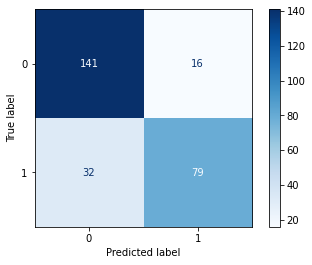

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.neural_network import MLPClassifier

#mulai learning 
model=MLPClassifier(max_iter=1000)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# imbalanced dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampling = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = under_sampling.fit_resample(X_train, y_train)

print('sebelum undersampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah undersampling')
print(pd.DataFrame(y_resampled).value_counts())

sebelum undersampling
0    392
1    231
dtype: int64
setelah undersampling
0    231
1    231
dtype: int64
